<a href="https://colab.research.google.com/github/ShivaKumarDande/Python-Practise-Codes/blob/main/CV_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageFilter

In [10]:
def median_filter(img, filter_size):
    h, w = img.shape
    pad = filter_size // 2
    padded_img = np.pad(img, ((pad, pad), (pad, pad)), mode='constant')
    output = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            output[i, j] = np.median(padded_img[i:i+filter_size, j:j+filter_size])
    return output

# Generate the 8x8 image I with pixel values following the equation I(i, j) = |i - j|
I = np.abs(np.arange(8)[:, np.newaxis] - np.arange(8))
print(I)
# Apply the 3x3 median filter on the image I
median_filtered_image = median_filter(I, 3)

print(median_filtered_image)

[[0 1 2 3 4 5 6 7]
 [1 0 1 2 3 4 5 6]
 [2 1 0 1 2 3 4 5]
 [3 2 1 0 1 2 3 4]
 [4 3 2 1 0 1 2 3]
 [5 4 3 2 1 0 1 2]
 [6 5 4 3 2 1 0 1]
 [7 6 5 4 3 2 1 0]]
[[0 0 1 2 3 4 5 0]
 [0 1 1 2 3 4 5 5]
 [1 1 1 1 2 3 4 4]
 [2 2 1 1 1 2 3 3]
 [3 3 2 1 1 1 2 2]
 [4 4 3 2 1 1 1 1]
 [5 5 4 3 2 1 1 0]
 [0 5 4 3 2 1 0 0]]


In [11]:
import numpy as np

# Define the 1D step profile f(i) = 4 if i ∈ [0, 3] and 8 if i ∈ [4, 7]
f = np.zeros(8)
f[:4] = 4
f[4:] = 8

# Define the median filter with window size of 3
def median_filter(f, n):
    pad = n // 2
    padded_f = np.pad(f, (pad, pad), mode='edge')
    output = np.zeros_like(f)
    for i in range(len(f)):
        output[i] = np.median(padded_f[i:i+n])
    return output

# Define the averaging filter with mask [1/4 2/4 1/4]
def avg_filter(f, mask):
    pad = len(mask) // 2
    padded_f = np.pad(f, (pad, pad), mode='edge')
    output = np.zeros_like(f)
    for i in range(len(f)):
        output[i] = np.sum(mask * padded_f[i:i+len(mask)])
    return output

# Apply the median filter with window size of 3 on the 1D step profile f
median_filtered_f = median_filter(f, 3)

# Apply the averaging filter with mask [1/4 2/4 1/4] on the 1D step profile f
mask = np.array([1/4, 2/4, 1/4])
avg_filtered_f = avg_filter(f, mask)

print("Median filtered f: ", median_filtered_f)
print("Averaged filtered f: ", avg_filtered_f)

Median filtered f:  [4. 4. 4. 4. 8. 8. 8. 8.]
Averaged filtered f:  [4. 4. 4. 5. 7. 8. 8. 8.]


In [18]:
#Q7
import numpy as np

# Define the 8x8 image f(x,y) = |x - y|
f = np.zeros((8, 8))
for x in range(8):
    for y in range(8):
        f[x, y] = abs(x - y)

# Define the Prewitt masks for finding the gradient in x and y directions
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Define the Sobel masks for finding the gradient in x and y directions
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Define a function to convolve a 2D image with a given mask
def convolve(f, mask):
    output = np.zeros_like(f)
    for x in range(1, 7):
        for y in range(1, 7):
            window = f[x-1:x+2, y-1:y+2]
            output[x, y] = np.sum(window * mask)
    return output

# Find the gradient in x and y directions using the Prewitt masks
prewitt_grad_x = convolve(f, prewitt_x)
prewitt_grad_y = convolve(f, prewitt_y)

print(prewitt_x)
print(prewitt_y)

print(sobel_x)
print(sobel_y)

# Find the gradient in x and y directions using the Sobel masks
sobel_grad_x = convolve(f, sobel_x)
sobel_grad_y = convolve(f, sobel_y)

# Calculate the magnitude and orientation of the gradient using the Prewitt masks
prewitt_magnitude = np.sqrt(prewitt_grad_x**2 + prewitt_grad_y**2)
prewitt_orientation = np.arctan2(prewitt_grad_y, prewitt_grad_x)

# Calculate the magnitude and orientation of the gradient using the Sobel masks
sobel_magnitude = np.sqrt(sobel_grad_x**2 + sobel_grad_y**2)
sobel_orientation = np.arctan2(sobel_grad_y, sobel_grad_x)

print("Prewitt magnitude: \n", prewitt_magnitude)
print("Prewitt orientation: \n", prewitt_orientation)
print("Sobel magnitude: \n", sobel_magnitude)
print("Sobel orientation: \n", sobel_orientation)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
Prewitt magnitude: 
 [[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         5.65685425 8.48528137 8.48528137 8.48528137
  8.48528137 0.        ]
 [0.         5.65685425 0.         5.65685425 8.48528137 8.48528137
  8.48528137 0.        ]
 [0.         8.48528137 5.65685425 0.         5.65685425 8.48528137
  8.48528137 0.        ]
 [0.         8.48528137 8.48528137 5.65685425 0.         5.65685425
  8.48528137 0.        ]
 [0.         8.48528137 8.48528137 8.48528137 5.65685425 0.
  5.65685425 0.        ]
 [0.         8.48528137 8.48528137 8.48528137 8.48528137 5.65685425
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Prewitt orientation: 
 [[ 0.          0.          0.          0.          0.          0.
   0.          0.    

[[ 1.  4.  6.  6.  6.  6.  6.  3.]
 [-1.  0.  4.  6.  6.  6.  6.  3.]
 [-3. -4.  0.  4.  6.  6.  6.  3.]
 [-3. -6. -4.  0.  4.  6.  6.  3.]
 [-3. -6. -6. -4.  0.  4.  6.  3.]
 [-3. -6. -6. -6. -4.  0.  4.  3.]
 [-3. -6. -6. -6. -6. -4.  0.  1.]
 [-3. -6. -6. -6. -6. -6. -4. -1.]]
[[-1.  1.  3.  3.  3.  3.  3.  3.]
 [-4.  0.  4.  6.  6.  6.  6.  6.]
 [-6. -4.  0.  4.  6.  6.  6.  6.]
 [-6. -6. -4.  0.  4.  6.  6.  6.]
 [-6. -6. -6. -4.  0.  4.  6.  6.]
 [-6. -6. -6. -6. -4.  0.  4.  6.]
 [-6. -6. -6. -6. -6. -4.  0.  4.]
 [-3. -3. -3. -3. -3. -3. -1.  1.]]
[[ 2.  6.  8.  8.  8.  8.  8.  4.]
 [-2.  0.  6.  8.  8.  8.  8.  4.]
 [-4. -6.  0.  6.  8.  8.  8.  4.]
 [-4. -8. -6.  0.  6.  8.  8.  4.]
 [-4. -8. -8. -6.  0.  6.  8.  4.]
 [-4. -8. -8. -8. -6.  0.  6.  4.]
 [-4. -8. -8. -8. -8. -6.  0.  2.]
 [-4. -8. -8. -8. -8. -8. -6. -2.]]
[[-2.  2.  4.  4.  4.  4.  4.  4.]
 [-6.  0.  6.  8.  8.  8.  8.  8.]
 [-8. -6.  0.  6.  8.  8.  8.  8.]
 [-8. -8. -6.  0.  6.  8.  8.  8.]
 [-8. -8. -8. -6.

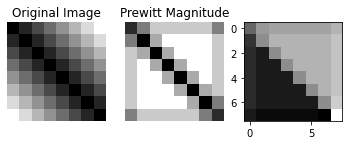

In [23]:
#Q7
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)
# Define the image f(x, y) = |x - y|
f = np.zeros((8, 8))
for x in range(8):
    for y in range(8):
        f[x, y] = np.abs(x - y)

# Define the Prewitt mask
prewitt_mask_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_mask_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Define the Sobel mask
sobel_mask_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_mask_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Define the convolution function
def convolve(f, mask):
    pad = len(mask) // 2
    padded_f = np.pad(f, (pad, pad), mode='edge')
    output = np.zeros_like(f)
    for x in range(len(f)):
        for y in range(len(f)):
            output[x, y] = np.sum(mask * padded_f[x:x+len(mask), y:y+len(mask)])
    return output

# Apply Prewitt mask
prewitt_x = convolve(f, prewitt_mask_x)
prewitt_y = convolve(f, prewitt_mask_y)

# Find the magnitude and orientation of the gradient using Prewitt mask
prewitt_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)
prewitt_orientation = np.arctan2(prewitt_y, prewitt_x)

# Apply Sobel mask
sobel_x = convolve(f, sobel_mask_x)
sobel_y = convolve(f, sobel_mask_y)

# Find the magnitude and orientation of the gradient using Sobel mask
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_orientation = np.arctan2(sobel_y, sobel_x)

print(prewitt_x)
print(prewitt_y)

print(sobel_x)
print(sobel_y)

# Plot the original image and the gradient magnitude and orientation
plt.subplot(231)
plt.imshow(f, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(232)
plt.imshow(prewitt_magnitude, cmap='gray')
plt.title("Prewitt Magnitude")
plt.axis('off')

plt.subplot(233)
plt.imshow(prewitt_orientation, cmap='gray')

print("Prewitt magnitude: \n", prewitt_magnitude)
print("Prewitt orientation: \n", prewitt_orientation)
print("Sobel magnitude: \n", sobel_magnitude)
print("Sobel orientation: \n", sobel_orientation)